<a href="https://colab.research.google.com/github/younghoonNa/ML/blob/main/Dacon/FIFA_plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
path = "/content/drive"
drive.mount(path)

Mounted at /content/drive


In [ ]:
pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# 데이터 분석 시 사용할 패키지
import pandas as pd
import numpy as np

In [ ]:
path = "/content/drive/MyDrive/FIFA"

In [ ]:
# 학습 데이터
train = pd.read_csv(path + '/train.csv')
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [ ]:
# 학습 데이터
test = pd.read_csv(path + '/test.csv')
test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


In [ ]:
# 학습 데이터
submission = pd.read_csv(path + '/submission.csv')
submission

,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
3823,16924,0
3824,16929,0
3825,16932,0
3826,16937,0


In [ ]:
train.loc[train["contract_until"]=="Jun 30, 2019","contract_until"] = 2018
train.loc[train["contract_until"]=="Dec 31, 2018","contract_until"] = 2018
train.loc[train["contract_until"]=="May 31, 2019","contract_until"] = 2019
train.loc[train["contract_until"]=="Jan 31, 2019","contract_until"] = 2018
train.loc[train["contract_until"]=="Jun 30, 2020","contract_until"] = 2019
train.loc[train["contract_until"]=="Jan 1, 2019","contract_until"] = 2018
train.loc[train["contract_until"]=="May 31, 2020","contract_until"] = 2020
train.loc[train["contract_until"]=="Jan 12, 2019","contract_until"] = 2018

test.loc[test["contract_until"]=="Jun 30, 2019","contract_until"] = 2018
test.loc[test["contract_until"]=="Dec 31, 2018","contract_until"] = 2018
test.loc[test["contract_until"]=="Dec 31, 2019","contract_until"] = 2019
test.loc[test["contract_until"]=="May 31, 2019","contract_until"] = 2019
test.loc[test["contract_until"]=="Jan 31, 2019","contract_until"] = 2018
test.loc[test["contract_until"]=="Jun 30, 2020","contract_until"] = 2019
test.loc[test["contract_until"]=="Jun 1, 2019","contract_until"] = 2019
test.loc[test["contract_until"]=="Jan 1, 2019","contract_until"] = 2018
test.loc[test["contract_until"]=="May 31, 2020","contract_until"] = 2020
test.loc[test["contract_until"]=="Jan 12, 2019","contract_until"] = 2018

# "2019", 2019를 하나로 묶어주기 위한 타입 변화
train["contract_until"] = train["contract_until"].astype(int)
test["contract_until"] = test["contract_until"].astype(int)

In [ ]:
train.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [ ]:
test.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   int64  
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 837.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   int64  
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 329.1+ KB


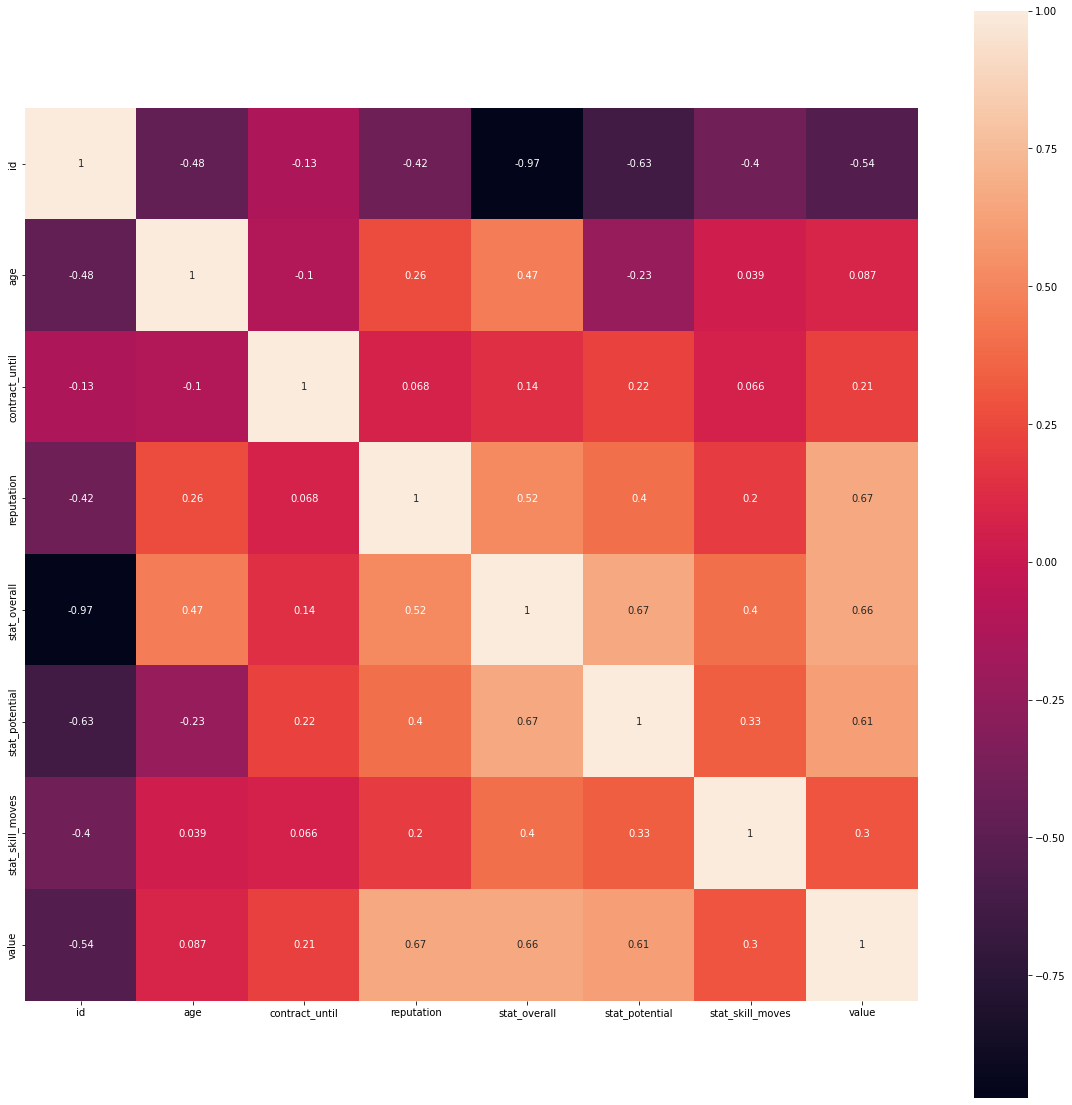

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,20))
sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True)
plt.show()

In [ ]:
train.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')

In [ ]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


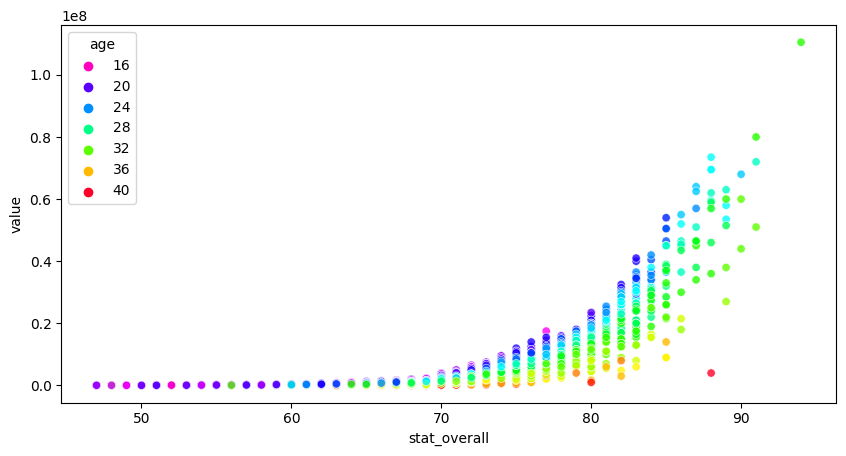

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=train, x='stat_overall',y='value',  hue = 'age', palette='gist_rainbow_r', alpha=0.8)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   int64  
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 837.5+ KB


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train[['contract_until', "reputation", "stat_overall", "stat_skill_moves"]], train['value'], 
                                                    random_state = 42, test_size = 0.1)

In [ ]:
print(y_train)

4347      50000.0
1488    8000000.0
1672    4000000.0
4891     575000.0
7567     450000.0
          ...    
5734     925000.0
5191     350000.0
5390     675000.0
860     5000000.0
7270     375000.0
Name: value, Length: 8038, dtype: float64


In [ ]:
x_train

,contract_until,reputation,stat_overall,stat_skill_moves
4347,2018,1.0,67,1.0
1488,2019,1.0,74,4.0
1672,2020,1.0,73,3.0
4891,2019,1.0,66,3.0
7567,2019,1.0,60,2.0
...,...,...,...,...
5734,2019,1.0,65,3.0
5191,2019,1.0,66,3.0
5390,2019,1.0,65,2.0
860,2020,2.0,76,3.0


In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

RMSE = 0
for p, y in zip(pred, y_test):
  RMSE += np.sqrt((p-y)**2)
print(RMSE)

[13:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
524927156.76953125


In [ ]:
train['World_Class'] = train[['stat_overall', 'age']].apply(lambda x: (0, 1)[(x['stat_overall'] >= 70 and \
    x['age'] <= 32) or (x['stat_overall'] >= 80 and x['age'] <= 36)], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train[['contract_until', "reputation", "stat_overall", "stat_skill_moves", "World_Class"]], train['value'], 
                                                    random_state = 42, test_size = 0.1)

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

RMSE = 0
for p, y in zip(pred, y_test):
  RMSE += np.sqrt((p-y)**2)
print(RMSE)

[13:13:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
475708620.7421875


In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

RMSE = 0
for p, y in zip(pred, y_test):
  RMSE += np.sqrt((p-y)**2)
print(RMSE)

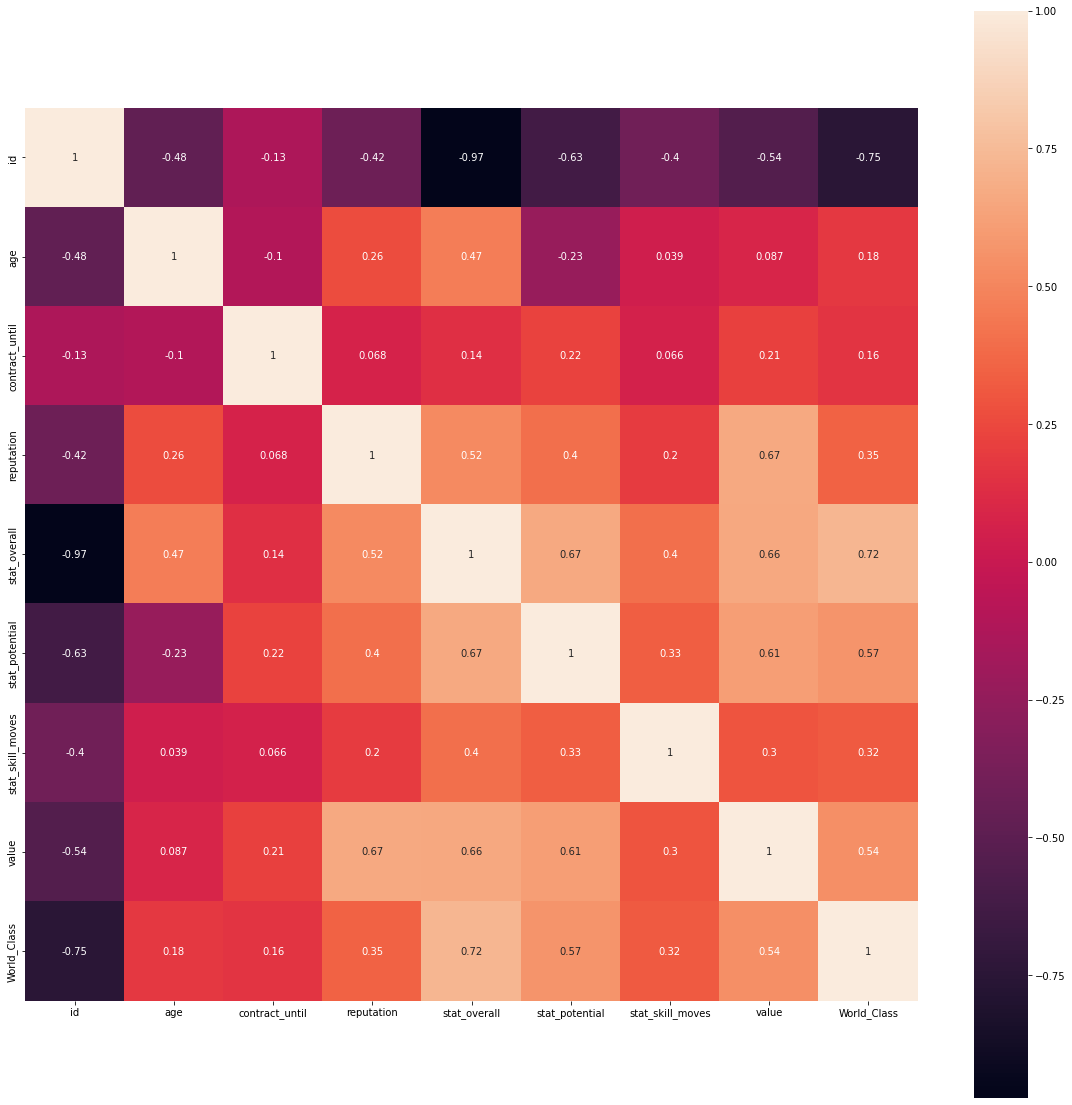

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,20))
sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True)
plt.show()

In [ ]:
from pycaret.regression import *
import jinja2
# pip install markupsafe==2.0.1 # 진자 오류시 다음과 같은 설치
setup_ = setup(data = train,             # 학습 데이터 
               target = 'value',  # 학습 데이터 중 예측해야 하는 값. (Train_test_spli을 하지 않아도 됨)
               ignore_features = ["id", "name", "prefer_foot"],
               session_id=42,            # random_state 값 고정 
               n_jobs = -1,              # 성능을 최대로 내기 위해 -1 사용.
               train_size = 0.9)        # Train - test 비율을 1:1로 나눔)
              #  numerical_features = ["contract_until"])
              #  silent =True)             # 이거 True로 두면 Enter 안누르고 진행 가능
#Slient를 사용하면 엔터 안쳐줘두 댐

# setup에서 feature의 type을 잘못 적었을 때 : numerical_features[변수명] 혹은 categorical_feautres[변수명]

ModuleNotFoundError: ignored

In [ ]:
# top3 = compare_models(sort='RMSE', n_select=3)
top3 = compare_models(sort='RMSE', n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.379845e+05,4.367663e+11,5.850292e+05,0.9883,0.1366,0.0720,2.004
xgboost,Extreme Gradient Boosting,1.617993e+05,6.536688e+11,7.707603e+05,0.9809,0.1155,0.0636,1.103
gbr,Gradient Boosting Regressor,2.408448e+05,6.529607e+11,7.711542e+05,0.9807,0.3348,0.2194,0.644
et,Extra Trees Regressor,1.755832e+05,7.162495e+11,8.085044e+05,0.9787,0.1051,0.0548,2.001
lightgbm,Light Gradient Boosting Machine,1.751049e+05,8.430135e+11,8.270010e+05,0.9768,0.1463,0.0819,0.155
rf,Random Forest Regressor,1.775636e+05,8.008901e+11,8.357152e+05,0.9771,0.0942,0.0536,2.049
knn,K Neighbors Regressor,2.390662e+05,9.043356e+11,8.707535e+05,0.9754,0.1219,0.0859,0.079
dt,Decision Tree Regressor,2.336438e+05,1.530962e+12,1.209859e+06,0.9522,0.1213,0.0582,0.040
ada,AdaBoost Regressor,1.872172e+06,4.933022e+12,2.206796e+06,0.8453,1.6147,5.4643,0.377
ridge,Ridge Regression,1.835722e+06,1.107875e+13,3.306713e+06,0.6621,1.3256,4.8318,0.017


In [ ]:
tuned_top3 = [tune_model(i,n_iter = 10) for i in top3]

In [ ]:
blender_top3 = stack_models(estimator_list=tuned_top3,optimize='RMSE')

In [ ]:
final_model = finalize_model(blender_top3)

In [ ]:
prediction = predict_model(final_model, data=test)

In [ ]:
train_list = ['age',
       'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train[train_list], train['value'], random_state = 42)

In [ ]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [ ]:
rmse = 0
for p, y in zip(pred, y_test):
  rmse += np.sqrt((p-y)**2)

In [ ]:
print(rmse/pred.__len__())

In [ ]:
model.predict(test[train_list])

In [ ]:
submission['value'] = model.predict(test[train_list])

In [ ]:
submission.to_csv('FIFA_one.csv', index = False)